In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [2]:
Olympians = pd.read_csv('../Raw_Data/athlete_events.csv')
Olympians

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
Olympians = Olympians.replace("Gold", 1)
Olympians = Olympians.replace("Silver", 1)
Olympians = Olympians.replace("Bronze", 1)
Olympians['Medal'] = Olympians['Medal'].fillna(0).astype(int)
Olympians

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [4]:
Olympians = Olympians.drop(['ID', 'Name', 'Games', 'City'], axis = 1)

In [5]:
Olympians.isna().mean() # shows the percent of missing valuse in the dataframe thanks StackOverflow! :D

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [6]:
Olympians.groupby(['Medal', 'Sex']).mean().astype(np.int) # this shows the average age, height, and weight and year, not important, of those that have one a medal and those that have not based on the gender StackOverflow
                                                          # astype(np.int) also StackOverflow crazy helpful

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

In [7]:
for x in ['Age', 'Height', 'Weight']:
    Olympians[x] = Olympians.groupby(["Medal", 'Sex'])[x].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [8]:
Olympians  # no more missing values

,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Football,Football Men's Football,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29,179,89,Poland-1,POL,1976,Winter,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27,176,59,Poland,POL,2014,Winter,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27,176,59,Poland,POL,2014,Winter,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30,185,96,Poland,POL,1998,Winter,Bobsleigh,Bobsleigh Men's Four,0


In [9]:
{x : len(Olympians[x].unique()) for x in Olympians.select_dtypes('object').columns} # iterate through all the columns to display the number of unique valuse in each column this is going to determine if its one_hot_encoding or binary_encoding 

{'Sex': 2, 'Team': 1184, 'NOC': 230, 'Season': 2, 'Sport': 66, 'Event': 765}

In [10]:
def binary_encode(df, columns, one_values):
    df = df.copy()
    for column, one_value in zip(columns, one_values):
        df[column] = df[column].apply(lambda x: 1 if x == one_value else 0) # returns 1 if "x" is a 1
    return df
    
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix) # gets the onehot columns
        df = pd.concat([df, dummies], axis=1)  # puts the new columns next to the new dummies columns
        df = df.drop(column, axis=1) # drop the old columns keep the dummies
    return df

In [11]:
Olympians = binary_encode(
    Olympians,
    columns=['Sex', 'Season'],
    one_values=['M', 'Summer']
)

Olympians = onehot_encode(
    Olympians,
    columns=['Team', 'NOC', 'Sport', 'Event'],
    prefixes=['T', 'N', 'S', 'E']
)

In [12]:
Olympians

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
corr = Olympians.loc[:, :'Medal'].corr()

In [14]:
np.triu(np.ones_like(corr))

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

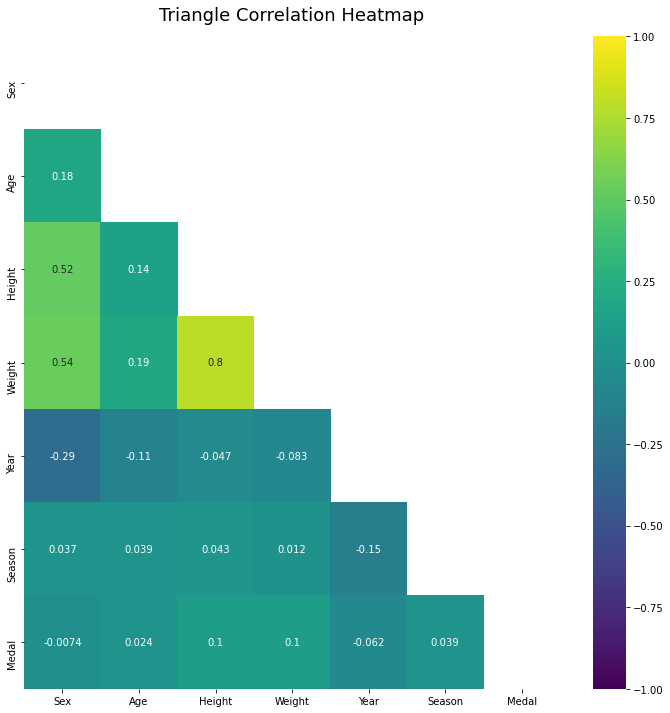

In [15]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

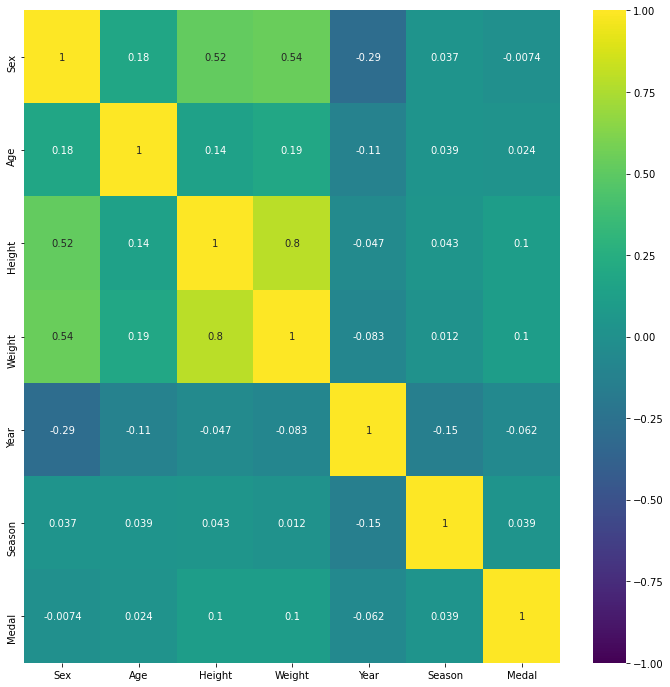

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, vmin=-1, cmap='viridis')
plt.show()

In [17]:
Olympians

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = Olympians.drop('Medal', axis=1).copy()
y = Olympians['Medal'].copy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

,Sex,Age,Height,Weight,Year,Season,T_30. Februar,T_A North American Team,T_Acipactli,T_Acturus,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
256920,0,20,175,105,2008,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241699,1,30,170,64,1980,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28159,0,29,188,73,2008,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249960,1,34,180,70,1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238594,1,39,188,95,1924,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259178,1,45,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,1,29,193,90,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,0,16,170,62,2004,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train) this is not in the range of (-1,1) i have established this to be 0 and 1 as the binary endode

In [21]:
inputs = tf.keras.Input(shape=X.shape[1])
x = tf.keras.layers.Dense(100, activation='relu')(inputs)
x=tf.keras.layers.Dense(100, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs,outputs)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

trying = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 16,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
20334/20334 [==============================] - 23s 1ms/step - loss: 0.4239 - accuracy: 0.8498 - val_loss: 0.3936 - val_accuracy: 0.8521
Epoch 2/100
20334/20334 [==============================] - 22s 1ms/step - loss: 0.3723 - accuracy: 0.8535 - val_loss: 0.3584 - val_accuracy: 0.8521
Epoch 3/100
20334/20334 [==============================] - 23s 1ms/step - loss: 0.3655 - accuracy: 0.8535 - val_loss: 0.3559 - val_accuracy: 0.8521
Epoch 4/100
20334/20334 [==============================] - 22s 1ms/step - loss: 0.3612 - accuracy: 0.8543 - val_loss: 0.3572 - val_accuracy: 0.8557
Epoch 5/100
20334/20334 [==============================] - 23s 1ms/step - loss: 0.3585 - accuracy: 0.8561 - val_loss: 0.3522 - val_accuracy: 0.8554
Epoch 6/100
20334/20334 [==============================] - 22s 1ms/step - loss: 0.3567 - accuracy: 0.8564 - val_loss: 0.3520 - val_accuracy: 0.8555
Epoch 7/100
20334/20334 [==============================] - 21s 1ms/step - loss: 0.3548 - accuracy: 0.8565 - val_

In [22]:
model.evaluate(X_test, y_test)

2119/2119 [==============================] - 2s 732us/step - loss: 0.3434 - accuracy: 0.8609


[0.3434348702430725, 0.8608713746070862]

In [23]:
y_true = np.array(y_test)
y_prediction = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int))

In [31]:
print("Classification report:\n", classification_report(y_true, y_prediction))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92     57843
           1       0.66      0.11      0.18      9936

    accuracy                           0.86     67779
   macro avg       0.76      0.55      0.55     67779
weighted avg       0.84      0.86      0.82     67779



In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_true, y_prediction))

Confusion Matrix:
 [[57291   552]
 [ 8878  1058]]


In [26]:
#[True Negatives                    predicted Positive but was negative]
#[Predicted Negative was positive                        True Positives]